In [1]:
import itertools
import os, shutil
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from os.path import exists, join
from time import sleep, perf_counter
from BashColors import C
from CV2_Utils_2 import *
from TarfileFunctions import *

contentPath = os.getcwd()
cv2Path = join(contentPath, 'CV2Images')
dataGeneratorPath = join(contentPath, 'DataGenerator')
imagesPath = join(contentPath, 'images')

if exists(dataGeneratorPath):
    pass
    # shutil.rmtree(dataGeneratorPath)
else:
    tff.extractTarfiles('DataGenerator3.tar.gz')
sleep(1)

if exists(imagesPath):
    pass
    # shutil.rmtree(imagesPath)
else:
    tff.extractTarfiles('images.tar.gz')
sleep(1)

import matplotlib.pylab as plt
import numpy as np
np.set_printoptions(precision=4)

import tensorflow as tf
import tensorflow_hub as hub

print(f'TF version: {C.BIBlue}{tf.__version__}{C.ColorOff}')
print(f'Hub version: {C.BIBlue}{hub.__version__}{C.BIRed}')
print('GPU is', 'available' if tf.config.list_physical_devices('GPU') else 'NOT AVAILABLE')

TF version: 2.8.0
Hub version: 0.12.0
GPU is NOT AVAILABLE


In [2]:
earlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0, patience=2, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True,
    # print('\n',
)

checkpoints = tf.keras.callbacks.ModelCheckpoint(
    filepath = contentPath,
    monitor='loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None
)

# checkpoint_dir = './trainingCheckpoints'
checkpoint_dir = contentPath
checkpoint_prefix = join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_prefix, save_weights_only = False
)
print('ok')

ok


In [3]:
modelList=['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']
count=0
for model in modelList:
    print(f'{count}. {model}')
    count+=1

0. efficientnetv2-s
1. efficientnetv2-m
2. efficientnetv2-l
3. efficientnetv2-s-21k
4. efficientnetv2-m-21k
5. efficientnetv2-l-21k
6. efficientnetv2-xl-21k
7. efficientnetv2-b0-21k
8. efficientnetv2-b1-21k
9. efficientnetv2-b2-21k
10. efficientnetv2-b3-21k
11. efficientnetv2-s-21k-ft1k
12. efficientnetv2-m-21k-ft1k
13. efficientnetv2-l-21k-ft1k
14. efficientnetv2-xl-21k-ft1k
15. efficientnetv2-b0-21k-ft1k
16. efficientnetv2-b1-21k-ft1k
17. efficientnetv2-b2-21k-ft1k
18. efficientnetv2-b3-21k-ft1k
19. efficientnetv2-b0
20. efficientnetv2-b1
21. efficientnetv2-b2
22. efficientnetv2-b3
23. efficientnet_b0
24. efficientnet_b1
25. efficientnet_b2
26. efficientnet_b3
27. efficientnet_b4
28. efficientnet_b5
29. efficientnet_b6
30. efficientnet_b7
31. bit_s-r50x1
32. inception_v3
33. inception_resnet_v2
34. resnet_v1_50
35. resnet_v1_101
36. resnet_v1_152
37. resnet_v2_50
38. resnet_v2_101
39. resnet_v2_152
40. nasnet_large
41. nasnet_mobile
42. pnasnet_large
43. mobilenet_v2_100_224
44. mobi

In [4]:
# model_name = "mobilenet_v2_100_224" 
#model_name = 'mobilenet_v3_small_075_224'
model_name = modelList[46]
# @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"model name: {model_name}\nurl: {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 8 # @param {type:"integer"}

model name: mobilenet_v3_small_100_224
url: https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5
Input size (224, 224)


In [5]:
from tensorflow.keras.layers import RandomFlip, RandomTranslation

def build_dataset(subset):
    return tf.keras.preprocessing.image_dataset_from_directory(
        dataGeneratorPath,
        shuffle = False,
        validation_split = 0.2,
        subset = subset,
        label_mode = "categorical",
        seed = 456, # Seed provided when using validation_split 
        # and shuffle  =  True.
        # A fixed seed is used so that the validation set is stable 
        # across runs.
        image_size = IMAGE_SIZE,
        batch_size = BATCH_SIZE)

train_ds  =  build_dataset("training")
class_names  =  tuple(train_ds.class_names)
train_size  =  train_ds.cardinality().numpy()
train_ds  =  train_ds.unbatch().batch(BATCH_SIZE)
train_ds  =  train_ds.repeat()

normalization_layer  =  tf.keras.layers.Rescaling(1. / 255)
preprocessing_model  =  tf.keras.Sequential([normalization_layer])
do_data_augmentation  =  True
if do_data_augmentation:
    preprocessing_model.add(tf.keras.layers.RandomRotation(40))
    
    preprocessing_model.add(RandomTranslation(0, 0.05))
    preprocessing_model.add(RandomTranslation(0.05, 0))
    preprocessing_model.add(RandomTranslation(0, 0.1))
    preprocessing_model.add(RandomTranslation(0.1, 0))
    preprocessing_model.add(RandomTranslation(0, 0.2))
    preprocessing_model.add(RandomTranslation(0.2, 0))
    # Like the old tf.keras.preprocessing.image.ImageDataGenerator(),
    # image sizes fixed when reading, then a random zoom is applied.
    # If training inputs larger than image_size, one could also use,
    # RandomCrop with a batch size of 1 and rebatch later.
    
    preprocessing_model.add(tf.keras.layers.RandomZoom(0.2, 0.2))
    preprocessing_model.add(tf.keras.layers.RandomZoom(-0.1, -0.1))
    
    preprocessing_model.add(RandomFlip(mode = "horizontal"))
    preprocessing_model.add(RandomFlip(mode = "vertical"))
    
train_ds  =  train_ds.map(lambda images, labels:
                        (preprocessing_model(images), labels))

val_ds  =  build_dataset("validation")
valid_size  =  val_ds.cardinality().numpy()
val_ds  =  val_ds.unbatch().batch(BATCH_SIZE)
val_ds  =  val_ds.map(lambda images, labels:
                    (normalization_layer(images), labels))

Found 843 files belonging to 3 classes.
Using 675 files for training.
Found 843 files belonging to 3 classes.
Using 168 files for validation.


In [6]:
print(f'train_size: {train_size}\nvalid_size: {valid_size}')

train_size: 85
valid_size: 21


In [7]:
do_fine_tuning = True 

print(f'model url:\n{C.BIPurple}{model_handle}')
model = tf.keras.Sequential([
    # Explicitly define the input shape
    # so the model can be properly loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(
        len(class_names),
        kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
# model.summary()

model url:
https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5


In [8]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer = SGD(learning_rate=0.001, momentum=0.9),
    loss = CategoricalCrossentropy(from_logits=True,
                                   label_smoothing=0.1),
    metrics=['accuracy'])
print('ok')

ok


In [9]:
STEPS_PER_EPOCH = train_size
VALIDATION_STEPS = valid_size
# STEPS_PER_EPOCH = 676 // BATCH_SIZE
# VALIDATION_STEPS = 168 // BATCH_SIZE
print(f'train_size: {train_size} valid_size: {valid_size}')
print(STEPS_PER_EPOCH, VALIDATION_STEPS)

start=perf_counter()
hist = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    validation_data = val_ds,
    validation_steps = VALIDATION_STEPS,
    epochs = 1,
    shuffle = True,
    # verbose = 'auto',
    verbose = 1,
    workers = 1,
    use_multiprocessing = False,
    callbacks=[checkpoints]).history

finish=perf_counter()
cvu.printTime(start, finish)

train_size: 85 valid_size: 21
85 21
85/85 [==============================] - ETA: 0s - loss: 1.0442 - accuracy: 0.8459
Epoch 1: loss improved from inf to 1.04421, saving model to /home/jovyan
INFO:tensorflow:Assets written to: /home/jovyan/assets


INFO:tensorflow:Assets written to: /home/jovyan/assets


85/85 [==============================] - 138s 2s/step - loss: 1.0442 - accuracy: 0.8459 - val_loss: 1.5606 - val_accuracy: 0.4405
completed: 2.0 minutes 19.0 second(s)


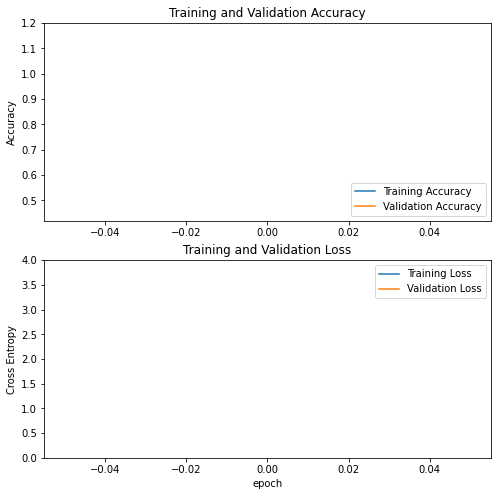

In [10]:
acc = hist['accuracy']
val_acc = hist['val_accuracy']

loss = hist['loss']
val_loss = hist['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.ylim([min(plt.ylim()), 1.2])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,4])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

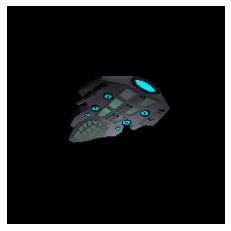

True label: Friendly
Predicted label: Friendly
[[-1.4162  2.0012 -1.3171]]


In [11]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3)
# before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])
print(prediction_scores)

In [12]:

saved_model_path = f"{contentPath}/Defcon4_{model_name}.h5"
print(saved_model_path)
tf.saved_model.save(model, saved_model_path)

NameError: name 'q' is not defined

In [ ]:

optimize_lite_model = True  # if True the model is trainable 
#Setting a value greater than zero enables quantization of neural network activations. A few dozen is already a useful amount.
num_calibration_examples = 60  # min:0, max:1000, step:1
representative_dataset = None
if optimize_lite_model and num_calibration_examples:
  # Use a bounded number of training examples without labels for calibration.
  # TFLiteConverter expects a list of input tensors, each with batch size 1.
    representative_dataset = lambda: itertools.islice(([image[None, ...]] for batch, _ in train_ds for image in batch),
      num_calibration_examples)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
if optimize_lite_model:
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    if representative_dataset:  # This is optional, see above.
        converter.representative_dataset = representative_dataset
        
lite_model_content = converter.convert()

with open(f"{contentPath}/Defcon4_{model_name}.tflite", "wb") as f:
    f.write(lite_model_content)
print("Wrote %sTFLite model of %d bytes." %
      ("optimized " if optimize_lite_model else "",
       len(lite_model_content)))
print(f'{len(lite_model_content) / 1024 / 1024} megabytes')

In [ ]:
interpreter = tf.lite.Interpreter(model_content=lite_model_content)
# This little helper wraps the TFLite Interpreter as a numpy-to-numpy function.
def lite_model(images):
    interpreter.allocate_tensors()
    interpreter.set_tensor(
        interpreter.get_input_details()[0]['index'], images)
    interpreter.invoke()
    return interpreter.get_tensor(
        interpreter.get_output_details()[0]['index'])

In [ ]:
#@markdown For rapid experimentation, start with a moderate number of examples.
num_eval_examples = 25  #@param {type:"slider", min:0, max:700}
eval_dataset = ((image, label)  # TFLite expects batch size 1.
                for batch in train_ds
                for (image, label) in zip(*batch))
count = 0
count_lite_tf_agree = 0
count_lite_correct = 0
for image, label in eval_dataset:
    probs_lite = lite_model(image[None, ...])[0]
    probs_tf = model(image[None, ...]).numpy()[0]
    y_lite = np.argmax(probs_lite)
    y_tf = np.argmax(probs_tf)
    y_true = np.argmax(label)
    count +=1
    if y_lite == y_tf: count_lite_tf_agree += 1
    if y_lite == y_true: count_lite_correct += 1
    if count >= num_eval_examples: break
print("TFLite model agrees with original model on %d of %d examples (%g%%)." %
      (count_lite_tf_agree, count, 100.0 * count_lite_tf_agree / count))
print("TFLite model is accurate on %d of %d examples (%g%%)." %
      (count_lite_correct, count, 100.0 * count_lite_correct / count))

In [ ]:
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)
help(logging)